In [1]:
import os
import pandas as pd
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

pd.options.mode.chained_assignment = None
file_path = 'C:/Users/cvikas10/Desktop/New folder'

file_name = 'PPM_LATEST_DATA.txt'

df_ppm  = pd.read_table(os.path.join(file_path,file_name),
                        delimiter='\t',
                        converters={'id':str,
                                    'fixid':str,
                                    'tin':str,
                                    'mpin':str,
                                    'npi':str,
                                    'strategic_acct_flag':str,
                                    'core_acct_flag':str,
                                    'medicare_flag':str,
                                    'cands_flag':str,
                                    'fqhc_flag':str,
                                    'platinum_flag':str,
                                    'region':str,
                                    'healthplan':str,
                                    'respondent_type':str,
                                    'mode':str,
                                    'rptqtr':str,
                                    'qtryr':str,
                                    'response_date':str,
                                    'time':str,
                                    'a1_md':str,
                                    'a1_pm':str,
                                    'a1_other':str,
                                    'a1_other_ops':str,
                                    'sat1':str,
                                    'sat2':str,
                                    'sat1_oe':str,
                                    'sat3':str,
                                    'sat4':str,
                                    'com1':str,
                                    'com2a':str,
                                    'com2b':str,
                                    'com2c':str,
                                    'com2d':str,
                                    'cs1':str,
                                    'cs2a':str,
                                    'cs2b':str,
                                    'cs2c':str,
                                    'cs3a':str,
                                    'cs3b':str,
                                    'cs3c':str,
                                    'cs3d':str,
                                    'cs3e':str,
                                    'cs3f':str,
                                    'cs3g':str,
                                    'cred1a':str,
                                    'cred1b':str,
                                    'cred1c':str,
                                    'cred1d':str,
                                    'cred1e':str,
                                    'rx1':str,
                                    'rx2':str,
                                    'rx3':str,
                                    'auth1a':str,
                                    'auth1b':str,
                                    'auth1c':str,
                                    'auth1d':str,
                                    'auth1e':str,
                                    'auth1f':str,
                                    'mr1':str,
                                    'mr2':str,
                                    'mr3':str,
                                    'net1a':str,
                                    'net1b':str,
                                    'net1c':str,
                                    'cl1_oe':str,
                                    'cl2':str,
                                    'cl3o1':str,
                                    'cl3o2':str,
                                    'cl3o3':str,
                                    'cl3o4':str,
                                    'cl3o5':str,
                                    'cl3o6':str,
                                    'cl3o7':str,
                                    'cl3o8':str,
                                    'cl3o9':str,
                                    'cl3o10':str,
                                    'cl3o11':str,
                                    'cl3other_r12':str,
                                    'cl4':str,
                                    'name':str,
                                    'phone':str,
                                    'email':str,
                                    'address':str,
                                    'city':str,
                                    'state':str,
                                    'zipcode':str,
                                    'permission':str,
                                    'draw':str,
                                    'prov_firstname':str,
                                    'prov_lastname':str,
                                    'prov_address1':str,
                                    'prov_address2':str,
                                    'prov_city':str,
                                    'prov_state':str,
                                    'prov_zipcode':str,
                                    'prov_county':str,
                                    'prov_marketname':str,
                                    'prov_specialty':str,
                                    'survey':str,
                                    'sample_type':str,
                                    'complete_type':str})

In [2]:
import sys
sys.path.insert(0,'C:/Users/cvikas10/Documents/Python Programs')

from nlp_modules import *

C:\AnacondaIDE\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
df_ppm.shape

(9786, 101)

In [5]:
df_ppm.columns

Index(['id', 'fixid', 'tin', 'mpin', 'npi', 'strategic_acct_flag',
       'core_acct_flag', 'medicare_flag', 'cands_flag', 'fqhc_flag',
       ...
       'prov_address2', 'prov_city', 'prov_state', 'prov_zipcode',
       'prov_county', 'prov_marketname', 'prov_specialty', 'survey',
       'sample_type', 'complete_type'],
      dtype='object', length=101)

In [4]:
df_ppm[['sat2','sat1_oe']].head(10)

,sat2,sat1_oe
0,10,Always welcome new patients.
1,2,Intrusive requirements. Inability to use our ...
2,3,"I want our schedules full, so if there are ope..."
3,3,
4,8,
5,8,
6,5,Neutral in feelings.
7,8,We are currently accepting new patients and co...
8,6,Billing and authorizations consume a lot of time.
9,3,It would depend on their other choices before ...


In [274]:
for d in df_ppm.describe().columns:
    print (df_ppm.describe()[d])

count             9786
unique            8197
top       201700000711
freq                 3
Name: id, dtype: object
count         9786
unique        9737
top       99438740
freq             2
Name: fixid, dtype: object
count          9786
unique         7225
top       542129332
freq             19
Name: tin, dtype: object
count        9786
unique       8290
top       2211224
freq            5
Name: mpin, dtype: object
count     9786
unique    8143
top           
freq       182
Name: npi, dtype: object
count     9786
unique       2
top          0
freq      9261
Name: strategic_acct_flag, dtype: object
count     9786
unique       3
top          0
freq      5942
Name: core_acct_flag, dtype: object
count     9786
unique       3
top          1
freq      4935
Name: medicare_flag, dtype: object
count     9786
unique       2
top          1
freq      4941
Name: cands_flag, dtype: object
count     9786
unique       3
top          0
freq      7485
Name: fqhc_flag, dtype: object
count     9786
uni

In [5]:
df_ppm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9786 entries, 0 to 9785
Columns: 101 entries, id to complete_type
dtypes: object(101)
memory usage: 7.5+ MB


In [5]:
df_ppm.isnull().sum()

id                     0
fixid                  0
tin                    0
mpin                   0
npi                    0
strategic_acct_flag    0
core_acct_flag         0
medicare_flag          0
cands_flag             0
fqhc_flag              0
platinum_flag          0
region                 0
healthplan             0
respondent_type        0
mode                   0
rptqtr                 0
qtryr                  0
response_date          0
time                   0
a1_md                  0
a1_pm                  0
a1_other               0
a1_other_ops           0
sat1                   0
sat1_oe                0
sat2                   0
sat3                   0
sat4                   0
com1                   0
com2a                  0
                      ..
cl3o6                  0
cl3o7                  0
cl3o8                  0
cl3o9                  0
cl3o10                 0
cl3o11                 0
cl3other_r12           0
cl4                    0
name                   0


In [7]:
df_ppm.dtypes

id                     object
fixid                  object
tin                    object
mpin                   object
npi                    object
strategic_acct_flag    object
core_acct_flag         object
medicare_flag          object
cands_flag             object
fqhc_flag              object
platinum_flag          object
region                 object
healthplan             object
respondent_type        object
mode                   object
rptqtr                 object
qtryr                  object
response_date          object
time                   object
a1_md                  object
a1_pm                  object
a1_other               object
a1_other_ops           object
sat1                   object
sat1_oe                object
sat2                   object
sat3                   object
sat4                   object
com1                   object
com2a                  object
                        ...  
cl3o6                  object
cl3o7                  object
cl3o8     

In [6]:
df_ppm['sat2'] = df_ppm['sat2'].astype(str)
for ind,row in df_ppm.iterrows():
    try:
        if (row['sat1_oe'] == '') | (row['sat1_oe'] == ' '):
            if (row['sat2']!='') & (float(row['sat2']) > 8.0):
                df_ppm.loc[ind,'sat1_oe'] = 'Positive Feedback'
            elif (row['sat2']!='') & (float(row['sat2']) <= 7.0):
                df_ppm.loc[ind,'sat1_oe'] = 'Negative Feedback'
            elif (row['sat2']!='') & (float(row['sat2']) == 8.0):
                df_ppm.loc[ind,'sat1_oe'] = 'Passive Feedback'
            elif row['sat2']=='':
                df_ppm.loc[ind,'sat1_oe'] = ''
        else:
            continue
    except:
        continue

In [29]:
df_ppm.head(10)

,id,fixid,tin,mpin,npi,strategic_acct_flag,core_acct_flag,medicare_flag,cands_flag,fqhc_flag,...,prov_address2,prov_city,prov_state,prov_zipcode,prov_county,prov_marketname,prov_specialty,survey,sample_type,complete_type
0,201600000261,33037073,363132612,570724,1003808411,0,,,1,,...,,,,,,,,,,
1,201600000234,89457743,650457414,1270697,1003812322,0,0,,0,0,...,,,,,,,,,,
2,201600000086,49468266,841367175,1114390,1003854324,0,1,0,0,0,...,,,,,,,,,,
3,201600000008,22421877,262203103,787955,1003856188,0,,1,0,,...,,,,,,,,,,
4,201682890499,82890499,341524851,663509,1003903600,0,,1,1,,...,,,,,,,,,,
5,201656363504,56363504,264779623,2997745,1003904566,0,0,0,1,0,...,,,,,,,,,,
6,201600000179,18743220,426004813,3361077,1013171891,0,1,0,1,1,...,,,,,,,,,,
7,201600000250,71018812,593575383,400466,1013923713,0,,1,1,,...,,,,,,,,,,
8,201600000127,46368266,381459362,948341,1013977115,0,1,0,1,0,...,,,,,,,,,,
9,201600000088,74178796,752544522,276802,1023006871,0,,1,1,,...,,,,,,,,,,


In [7]:
df_ppm[['sat2','sat1_oe']]

,sat2,sat1_oe
0,10,Always welcome new patients.
1,2,Intrusive requirements. Inability to use our ...
2,3,"I want our schedules full, so if there are ope..."
3,3,Negative Feedback
4,8,Passive Feedback
5,8,Passive Feedback
6,5,Neutral in feelings.
7,8,We are currently accepting new patients and co...
8,6,Billing and authorizations consume a lot of time.
9,3,It would depend on their other choices before ...


In [8]:
#length of comments
data_nonnull = df_ppm[(df_ppm['sat1_oe']!='') & (df_ppm['sat1_oe']!=' ')]
data_nonnull.shape

(5371, 101)

In [9]:
data_nonnull['sat2'] = data_nonnull['sat2'].astype(str)
dfppm = data_nonnull[(data_nonnull['sat2']!='')]

In [10]:
dfppm.shape

(5364, 101)

In [11]:
dfppm.reset_index(drop=True,inplace=True)
dfppm['review_length'] = dfppm['sat1_oe'].apply(len)
dfppm[['sat1_oe','review_length']].head(30)

,sat1_oe,review_length
0,Always welcome new patients.,28
1,Intrusive requirements. Inability to use our ...,98
2,"I want our schedules full, so if there are ope...",267
3,Neutral in feelings.,20
4,We are currently accepting new patients and co...,73
5,Billing and authorizations consume a lot of time.,49
6,It would depend on their other choices before ...,86
7,We have a huge issue with the new infertility ...,663
8,1. It is very difficult to speak with a live p...,258
9,We have noticed very poor claim processing of ...,452


In [12]:
#word count
dfppm['word_count'] = dfppm['sat1_oe'].apply(lambda t: len(t.split(" ")))
dfppm[['sat1_oe','word_count']].head(20)

,sat1_oe,word_count
0,Always welcome new patients.,4
1,Intrusive requirements. Inability to use our ...,15
2,"I want our schedules full, so if there are ope...",49
3,Neutral in feelings.,3
4,We are currently accepting new patients and co...,12
5,Billing and authorizations consume a lot of time.,8
6,It would depend on their other choices before ...,16
7,We have a huge issue with the new infertility ...,115
8,1. It is very difficult to speak with a live p...,53
9,We have noticed very poor claim processing of ...,76


In [13]:
dfppm.shape

(5364, 103)

In [14]:
dfppm.columns

Index(['id', 'fixid', 'tin', 'mpin', 'npi', 'strategic_acct_flag',
       'core_acct_flag', 'medicare_flag', 'cands_flag', 'fqhc_flag',
       ...
       'prov_state', 'prov_zipcode', 'prov_county', 'prov_marketname',
       'prov_specialty', 'survey', 'sample_type', 'complete_type',
       'review_length', 'word_count'],
      dtype='object', length=103)

In [15]:
def avg_word_len(text):
    tokens=text.split(" ")
    word_l = [len(word) for word in tokens]
    total_l = sum(word_l)
    avg_l = total_l/len(word_l)
    return (avg_l)

#average word length
dfppm['avg_word_length'] = dfppm['sat1_oe'].apply(lambda t: avg_word_len(t))
dfppm[['sat1_oe','avg_word_length']].head(10)

,sat1_oe,avg_word_length
0,Always welcome new patients.,6.250000
1,Intrusive requirements. Inability to use our ...,5.600000
2,"I want our schedules full, so if there are ope...",4.469388
3,Neutral in feelings.,6.000000
4,We are currently accepting new patients and co...,5.166667
5,Billing and authorizations consume a lot of time.,5.250000
6,It would depend on their other choices before ...,4.437500
7,We have a huge issue with the new infertility ...,4.773913
8,1. It is very difficult to speak with a live p...,3.886792
9,We have noticed very poor claim processing of ...,4.960526


In [16]:
#replace quotation with nothing
dfppm['cleaned'] = dfppm['sat1_oe'].apply(lambda t: t.replace("'",""))
#convert into lower case
dfppm['cleaned'] = dfppm['cleaned'].str.lower()

#replace punctuations
dfppm['cleaned'] = dfppm['cleaned'].str.replace('[^\w\s]','')
dfppm[['sat1_oe','cleaned']].head(10)

,sat1_oe,cleaned
0,Always welcome new patients.,always welcome new patients
1,Intrusive requirements. Inability to use our ...,intrusive requirements inability to use our l...
2,"I want our schedules full, so if there are ope...",i want our schedules full so if there are open...
3,Neutral in feelings.,neutral in feelings
4,We are currently accepting new patients and co...,we are currently accepting new patients and co...
5,Billing and authorizations consume a lot of time.,billing and authorizations consume a lot of time
6,It would depend on their other choices before ...,it would depend on their other choices before ...
7,We have a huge issue with the new infertility ...,we have a huge issue with the new infertility ...
8,1. It is very difficult to speak with a live p...,1 it is very difficult to speak with a live pe...
9,We have noticed very poor claim processing of ...,we have noticed very poor claim processing of ...


In [13]:
#Stopwords removal
def prepareStopWords():
 
    stopwordsList = []
 
    # Load default stop words and add a few more specific to my text.
    stopwordsList = stopwords.words('english')
    stopwordsList.append('dont')
    stopwordsList.append('didnt')
    stopwordsList.append('doesnt')
    stopwordsList.append('cant')
    stopwordsList.append('couldnt')
    stopwordsList.append('couldve')
    stopwordsList.append('im')
    stopwordsList.append('ive')
    stopwordsList.append('isnt')
    stopwordsList.append('theres')
    stopwordsList.append('wasnt')
    stopwordsList.append('wouldnt')
    stopwordsList.append('a')
    stopwordsList.append('also')
    stopwordsList.append('could')
    stopwordsList.append('would')
    stopwordsList.append('might')
    stopwordsList.append('may')
 
    return stopwordsList

stop = prepareStopWords()
stop = [i.replace("'","") for i in stop]

dfppm['bagofwords'] = dfppm['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfppm[['sat1_oe','cleaned','bagofwords']].head(10)

,sat1_oe,cleaned,bagofwords
0,Always welcome new patients.,always welcome new patients,always welcome new patients
1,Intrusive requirements. Inability to use our ...,intrusive requirements inability to use our l...,intrusive requirements inability use lab patie...
2,"I want our schedules full, so if there are ope...",i want our schedules full so if there are open...,want schedules full openings soon see filled a...
3,Neutral in feelings.,neutral in feelings,neutral feelings
4,We are currently accepting new patients and co...,we are currently accepting new patients and co...,currently accepting new patients continue see ...
5,Billing and authorizations consume a lot of time.,billing and authorizations consume a lot of time,billing authorizations consume lot time
6,It would depend on their other choices before ...,it would depend on their other choices before ...,depend choices hope uhc insurers
7,We have a huge issue with the new infertility ...,we have a huge issue with the new infertility ...,huge issue new infertility pa process subseque...
8,1. It is very difficult to speak with a live p...,1 it is very difficult to speak with a live pe...,1 difficult speak live person uhc collectively...
9,We have noticed very poor claim processing of ...,we have noticed very poor claim processing of ...,noticed poor claim processing maternity claims...


In [14]:
#common words removal
#selecting only 5 because if it is more than 10 then the token reimbursement will be lost
freq = pd.Series(' '.join(dfppm['bagofwords']).split()).value_counts()
print (freq)

patients            1844
uhc                 1379
insurance            748
new                  698
claims               594
unitedhealthcare     584
work                 453
reimbursement        447
easy                 447
good                 444
get                  431
patient              380
care                 380
difficult            376
practice             366
always               355
see                  355
time                 344
like                 343
united               337
issues               292
service              283
many                 267
prior                233
claim                229
provider             225
payment              223
healthcare           222
authorization        218
process              212
                    ... 
government             1
questioned             1
leeway                 1
nonbillable            1
tucson                 1
xray                   1
facilitate             1
untenable              1
film                   1


In [108]:
#common words removal
#selecting only 5 because if it is more than 10 then the token reimbursement will be lost
freq10 = pd.Series(' '.join(dfppm['bagofwords']).split()).value_counts()[:10]
print (freq10)

patients            1844
uhc                 1379
insurance            748
new                  698
claims               594
unitedhealthcare     584
work                 453
easy                 447
reimbursement        447
good                 444
dtype: int64


In [287]:
#common words removal
#selecting only 5 because if it is more than 10 then the token reimbursement will be lost
freq5 = pd.Series(' '.join(dfppm['bagofwords']).split()).value_counts()[:6]
print (freq5)

patients            1844
uhc                 1379
insurance            748
new                  698
claims               594
unitedhealthcare     584
dtype: int64


In [242]:
type(freq5)

pandas.core.series.Series

In [243]:
freq5.index

Index(['patients', 'uhc', 'insurance', 'new', 'claims', 'unitedhealthcare'], dtype='object')

In [15]:
freq_s = freq.loc[['uhc','insurance','unitedhealthcare','unitedhealthcares','patients','patient','insurances','united','uniteds','healthcare'],]
freq_s

uhc                  1379
insurance             748
unitedhealthcare      584
unitedhealthcares      10
patients             1844
patient               380
insurances            116
united                337
uniteds                 4
healthcare            222
dtype: int64

In [16]:
#all_words=pd.Series(' '.join(dfppm['bagofwords']).split()).value_counts()
#freq5 = list(freq5.index)
dfppm['bagofwords'] = dfppm['bagofwords'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_s))
dfppm[['sat1_oe','cleaned','bagofwords']].head(10)

,sat1_oe,cleaned,bagofwords
0,Always welcome new patients.,always welcome new patients,always welcome new
1,Intrusive requirements. Inability to use our ...,intrusive requirements inability to use our l...,intrusive requirements inability use lab unexp...
2,"I want our schedules full, so if there are ope...",i want our schedules full so if there are open...,want schedules full openings soon see filled a...
3,Neutral in feelings.,neutral in feelings,neutral feelings
4,We are currently accepting new patients and co...,we are currently accepting new patients and co...,currently accepting new continue see new
5,Billing and authorizations consume a lot of time.,billing and authorizations consume a lot of time,billing authorizations consume lot time
6,It would depend on their other choices before ...,it would depend on their other choices before ...,depend choices hope insurers
7,We have a huge issue with the new infertility ...,we have a huge issue with the new infertility ...,huge issue new infertility pa process subseque...
8,1. It is very difficult to speak with a live p...,1 it is very difficult to speak with a live pe...,1 difficult speak live person collectively aut...
9,We have noticed very poor claim processing of ...,we have noticed very poor claim processing of ...,noticed poor claim processing maternity claims...


In [17]:
#Rare words removal
#Optional
in_freq=freq = pd.Series(' '.join(dfppm['bagofwords']).split()).value_counts()[-5:]
print (in_freq)

helped         1
transaction    1
motivator      1
terribly       1
diagnosed      1
dtype: int64


In [18]:
#Optional
in_freq = list(in_freq.index)
dfppm['bagofwords_rarewords'] = dfppm['bagofwords'].apply(lambda x: " ".join(x for x in x.split() if x not in in_freq))
dfppm.columns

Index(['id', 'fixid', 'tin', 'mpin', 'npi', 'strategic_acct_flag',
       'core_acct_flag', 'medicare_flag', 'cands_flag', 'fqhc_flag',
       ...
       'prov_specialty', 'survey', 'sample_type', 'complete_type',
       'review_length', 'word_count', 'avg_word_length', 'cleaned',
       'bagofwords', 'bagofwords_rarewords'],
      dtype='object', length=107)

In [116]:
#Spelling corrections

spell_checked_comments = dfppm['bagofwords'].apply(lambda t: str(TextBlob(t).correct()))
dfppm['spell_checked'] = spell_checked_comments
dfppm[['sat1_oe','cleaned','spell_checked','bagofwords']].head(20)

,sat1_oe,cleaned,spell_checked,bagofwords
0,Always welcome new patients.,always welcome new patients,always welcome new patients,always welcome new patients
1,Intrusive requirements. Inability to use our ...,intrusive requirements inability to use our l...,intrusion requirements inability use lab patie...,intrusive requirements inability use lab patie...
2,"I want our schedules full, so if there are ope...",i want our schedules full so if there are open...,want schedules full openings soon see filled a...,want schedules full openings soon see filled a...
3,Neutral in feelings.,neutral in feelings,neutral feelings,neutral feelings
4,We are currently accepting new patients and co...,we are currently accepting new patients and co...,currently accepting new patients continue see ...,currently accepting new patients continue see ...
5,Billing and authorizations consume a lot of time.,billing and authorizations consume a lot of time,filling authorization consume lot time,billing authorizations consume lot time
6,It would depend on their other choices before ...,it would depend on their other choices before ...,depend choice hope insure,depend choices hope insurers
7,We have a huge issue with the new infertility ...,we have a huge issue with the new infertility ...,huge issue new fertility pa process subsequent...,huge issue new infertility pa process subseque...
8,1. It is very difficult to speak with a live p...,1 it is very difficult to speak with a live pe...,1 difficult speak live person collectively aut...,1 difficult speak live person collectively aut...
9,We have noticed very poor claim processing of ...,we have noticed very poor claim processing of ...,noticed poor claim processing paternity claims...,noticed poor claim processing maternity claims...


In [19]:
print (dfppm.columns)
#Stemming
st = PorterStemmer()
dfppm['stemmed_text']=dfppm['bagofwords'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
dfppm['stemmed_text'].head(10)

Index(['id', 'fixid', 'tin', 'mpin', 'npi', 'strategic_acct_flag',
       'core_acct_flag', 'medicare_flag', 'cands_flag', 'fqhc_flag',
       ...
       'prov_specialty', 'survey', 'sample_type', 'complete_type',
       'review_length', 'word_count', 'avg_word_length', 'cleaned',
       'bagofwords', 'bagofwords_rarewords'],
      dtype='object', length=107)


0                                     alway welcom new
1    intrus requir inabl use lab unexplain qualiti ...
2    want schedul full open soon see fill anyon reg...
3                                         neutral feel
4                   current accept new continu see new
5                          bill author consum lot time
6                              depend choic hope insur
7    huge issu new infertil pa process subsequ clai...
8    1 difficult speak live person collect autom sy...
9    notic poor claim process matern claim claim im...
Name: stemmed_text, dtype: object

In [20]:
#Lemmatization
#fb_corpus = " ".join(t for t in total_df['feedback'])
#wnl = nltk.WordNetLemmatizer()
#content_tokens = fb_corpus.split(" ")
#cleaned_tokens = [x for x in content_tokens if x is not ""]
#CORPUS_tokens = [wnl.lemmatize(t) for t in cleaned_tokens]
#CORPUS = " ".join(CORPUS_tokens)

from textblob import Word
dfppm['bagofwords'] = dfppm['bagofwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dfppm['bagofwords'].head(5)

0                                   always welcome new
1    intrusive requirement inability use lab unexpl...
2    want schedule full opening soon see filled any...
3                                      neutral feeling
4             currently accepting new continue see new
Name: bagofwords, dtype: object

In [21]:
#TF-IDF matrix

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,1))
sklearn_tfidf = TfidfVectorizer(norm='l2', min_df=0, use_idf=True, smooth_idf=False, sublinear_tf=False)
tfidf_set = sklearn_tfidf.fit_transform(dfppm['bagofwords'])
tfidf_set

<5364x4069 sparse matrix of type '<class 'numpy.float64'>'
	with 39467 stored elements in Compressed Sparse Row format>

In [38]:
#Polarity
sia = SentimentIntensityAnalyzer()
dfppm['polarity'] = dfppm['cleaned'].apply(lambda s: sia.polarity_scores(s))
dfppm['polarity_compound'] = dfppm['cleaned'].apply(lambda s: sia.polarity_scores(s)['compound'])
dfppm['polarity_positive'] = dfppm['cleaned'].apply(lambda s: sia.polarity_scores(s)['pos'])
dfppm['polarity_negative'] = dfppm['cleaned'].apply(lambda s: sia.polarity_scores(s)['neg'])
dfppm['polarity_neutral'] = dfppm['cleaned'].apply(lambda s: sia.polarity_scores(s)['neu'])
dfppm['subjectivity'] = dfppm['cleaned'].apply(lambda s: TextBlob(s).sentiment.subjectivity)
#total_df.to_csv(os.path.join(path,'new_scores_ppm.csv'),index=False)

dfppm[['sat1_oe','cleaned','bagofwords','polarity','polarity_compound','polarity_positive','polarity_negative','polarity_neutral']].head(10)

#Tested with both 'cleaned' and 'bagofwords' headers to see how sentiment values are varying

,sat1_oe,cleaned,bagofwords,polarity,polarity_compound,polarity_positive,polarity_negative,polarity_neutral
0,Always welcome new patients.,always welcome new patients,always welcome new,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.4588,0.500,0.000,0.500
1,Intrusive requirements. Inability to use our ...,intrusive requirements inability to use our l...,intrusive requirement inability use lab unexpl...,"{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...",-0.4019,0.000,0.184,0.816
2,"I want our schedules full, so if there are ope...",i want our schedules full so if there are open...,want schedule full opening soon see filled any...,"{'neg': 0.073, 'neu': 0.9, 'pos': 0.027, 'comp...",-0.4939,0.027,0.073,0.900
3,Neutral in feelings.,neutral in feelings,neutral feeling,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
4,We are currently accepting new patients and co...,we are currently accepting new patients and co...,currently accepting new continue see new,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.3818,0.191,0.000,0.809
5,Billing and authorizations consume a lot of time.,billing and authorizations consume a lot of time,billing authorization consume lot time,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
6,It would depend on their other choices before ...,it would depend on their other choices before ...,depend choice hope insurer,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...",0.4404,0.162,0.000,0.838
7,We have a huge issue with the new infertility ...,we have a huge issue with the new infertility ...,huge issue new infertility pa process subseque...,"{'neg': 0.075, 'neu': 0.857, 'pos': 0.068, 'co...",0.0469,0.068,0.075,0.857
8,1. It is very difficult to speak with a live p...,1 it is very difficult to speak with a live pe...,1 difficult speak live person collectively aut...,"{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...",-0.8930,0.000,0.241,0.759
9,We have noticed very poor claim processing of ...,we have noticed very poor claim processing of ...,noticed poor claim processing maternity claim ...,"{'neg': 0.158, 'neu': 0.789, 'pos': 0.053, 'co...",-0.8221,0.053,0.158,0.789


In [24]:
dfppm.shape

(5364, 114)

In [172]:
dfppm.columns

Index(['id', 'fixid', 'tin', 'mpin', 'npi', 'strategic_acct_flag',
       'core_acct_flag', 'medicare_flag', 'cands_flag', 'fqhc_flag',
       ...
       'cleaned', 'bagofwords', 'bagofwords_rarewords', 'stemmed_text',
       'polarity', 'polarity_compound', 'polarity_positive',
       'polarity_negative', 'polarity_neutral', 'subjectivity'],
      dtype='object', length=114)

In [25]:
parent_df = dfppm

In [26]:
parent_df.shape

(5364, 114)

In [175]:
parent_df.dtypes

id                       object
fixid                    object
tin                      object
mpin                     object
npi                      object
strategic_acct_flag      object
core_acct_flag           object
medicare_flag            object
cands_flag               object
fqhc_flag                object
platinum_flag            object
region                   object
healthplan               object
respondent_type          object
mode                     object
rptqtr                   object
qtryr                    object
response_date            object
time                     object
a1_md                    object
a1_pm                    object
a1_other                 object
a1_other_ops             object
sat1                     object
sat1_oe                  object
sat2                     object
sat3                     object
sat4                     object
com1                     object
com2a                    object
                         ...   
state   

In [27]:
pd.Categorical(parent_df['sat2']).categories

Index(['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [28]:
parent_df.isnull().sum()

id                      0
fixid                   0
tin                     0
mpin                    0
npi                     0
strategic_acct_flag     0
core_acct_flag          0
medicare_flag           0
cands_flag              0
fqhc_flag               0
platinum_flag           0
region                  0
healthplan              0
respondent_type         0
mode                    0
rptqtr                  0
qtryr                   0
response_date           0
time                    0
a1_md                   0
a1_pm                   0
a1_other                0
a1_other_ops            0
sat1                    0
sat1_oe                 0
sat2                    0
sat3                    0
sat4                    0
com1                    0
com2a                   0
                       ..
state                   0
zipcode                 0
permission              0
draw                    0
prov_firstname          0
prov_lastname           0
prov_address1           0
prov_address

In [31]:
parent_df = parent_df[parent_df['sat2']!='nan']
parent_df.shape

(5364, 113)

In [29]:
parent_df.select_dtypes(include=['O']).columns
#sat2 is a string here - actually should be numeric 

Index(['id', 'fixid', 'tin', 'mpin', 'npi', 'strategic_acct_flag',
       'core_acct_flag', 'medicare_flag', 'cands_flag', 'fqhc_flag',
       ...
       'prov_marketname', 'prov_specialty', 'survey', 'sample_type',
       'complete_type', 'cleaned', 'bagofwords', 'bagofwords_rarewords',
       'stemmed_text', 'polarity'],
      dtype='object', length=106)

In [30]:
parent_df['sat2'] = parent_df['sat2'].astype(int)
parent_df.select_dtypes(include=['int32','int64']).columns

Index(['sat2', 'review_length', 'word_count'], dtype='object')

In [31]:
pos_ppm_nps = parent_df[(parent_df['sat2'] == 9) |
                        (parent_df['sat2'] == 10)]

neu_ppm_nps = parent_df[(parent_df['sat2'] == 7) | (parent_df['sat2'] == 8)]
neg_ppm_nps = parent_df[parent_df['sat2'] < 7]

In [32]:
pos_ppm_nps.shape

(1378, 114)

In [36]:
neg_ppm_nps.shape

(2374, 113)

In [134]:
neu_ppm_nps.shape

(1612, 33)

In [42]:
for ind,row in parent_df.iterrows():
    if (parent_df.loc[ind,'sat2'] == 7):
        parent_df.loc[ind,'sentiment'] = 'neutral'
    elif (parent_df.loc[ind,'sat2']<7):
        parent_df.loc[ind,'sentiment'] = 'negative'
    elif (parent_df.loc[ind,'sat2'] > 7):
        parent_df.loc[ind,'sentiment'] = 'positive'
        
value_cnts_actual = parent_df['sentiment'].value_counts()
print (value_cnts_actual)

negative    2374
positive    2304
neutral      686
Name: sentiment, dtype: int64


In [43]:
for ind,row in parent_df.iterrows():
    if (parent_df.loc[ind,'polarity_positive']>parent_df.loc[ind,'polarity_negative']):
        parent_df.loc[ind,'sentiment_predicted'] = 'positive'
    elif (parent_df.loc[ind,'polarity_positive']<parent_df.loc[ind,'polarity_negative']):
        parent_df.loc[ind,'sentiment_predicted'] = 'negative'
    elif (parent_df.loc[ind,'polarity_positive']==parent_df.loc[ind,'polarity_negative']):
        parent_df.loc[ind,'sentiment_predicted'] = 'neutral'
        
value_cnts_pred = parent_df['sentiment_predicted'].value_counts()
print (value_cnts_pred)

positive    2745
negative    1533
neutral     1086
Name: sentiment_predicted, dtype: int64


In [44]:
actuals = parent_df['sentiment']
predicted = parent_df['sentiment_predicted']

actuals_list = parent_df['sentiment'].tolist()
predicted_list = parent_df['sentiment_predicted'].tolist()

vader_conf_matrix = pd.crosstab(actuals,predicted)

confusionMatrix = ConfusionMatrix(actuals_list,predicted_list)
confusionMatrix.print_stats()

cmatrix = confusion_matrix(actuals_list,predicted_list)
print (classification_report(actuals_list,predicted_list))
accuracy_score(actuals_list,predicted_list)

C:\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Confusion Matrix:

Predicted  negative  neutral  positive  __all__
Actual                                         
negative       1177      495       702     2374
neutral         151      162       373      686
positive        205      429      1670     2304
__all__        1533     1086      2745     5364


Overall Statistics:

Accuracy: 0.5609619686800895
95% CI: (0.5475578708942153, 0.5742996860624349)
No Information Rate: ToDo
P-Value [Acc > NIR]: 2.8234909821187643e-13
Kappa: 0.3006839470898452
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                negative    neutral  positive
Population                                 5364       5364      5364
P: Condition positive                      2374        686      2304
N: Condition negative                      2990       4678      3060
Test outcome positive                      1533       1086      2745
Test outcome negative                      3831       4278      2619
TP: True Positive               

0.5609619686800895

In [45]:
parent_df['textblob_polarity'] = parent_df['cleaned'].apply(lambda s: TextBlob(s).sentiment.polarity)

In [41]:
parent_df.columns

Index(['id', 'fixid', 'tin', 'mpin', 'npi', 'strategic_acct_flag',
       'core_acct_flag', 'medicare_flag', 'cands_flag', 'fqhc_flag',
       ...
       'stemmed_text', 'polarity', 'polarity_compound', 'polarity_positive',
       'polarity_negative', 'polarity_neutral', 'subjectivity', 'sentiment',
       'sentiment_predicted', 'textblob_polarity'],
      dtype='object', length=116)

In [46]:
for ind,row in parent_df.iterrows():
    if (parent_df.loc[ind,'textblob_polarity']>0):
        parent_df.loc[ind,'textblob_sentiment'] = 'positive'
    elif (parent_df.loc[ind,'textblob_polarity']<0):
        parent_df.loc[ind,'textblob_sentiment'] = 'negative'
    elif (parent_df.loc[ind,'textblob_polarity']==0):
        parent_df.loc[ind,'textblob_sentiment'] = 'neutral'
    

textblob_sentiments = parent_df['textblob_sentiment'].tolist()
tb_confMatrix = ConfusionMatrix(actuals_list,textblob_sentiments)
#tb_cm = pd.crosstab(actuals_list,textblob_sentiments)

tb_confMatrix.print_stats()

Confusion Matrix:

Predicted  negative  neutral  positive  __all__
Actual                                         
negative        886      625       863     2374
neutral         124      174       388      686
positive        154      522      1628     2304
__all__        1164     1321      2879     5364


Overall Statistics:

Accuracy: 0.5011185682326622
95% CI: (0.4876473056768103, 0.5145886128826168)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9999999183482888
Kappa: 0.22283337208140153
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                 negative     neutral  positive
Population                                  5364        5364      5364
P: Condition positive                       2374         686      2304
N: Condition negative                       2990        4678      3060
Test outcome positive                       1164        1321      2879
Test outcome negative                       4200        4043      2485
TP: True Positive      

C:\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


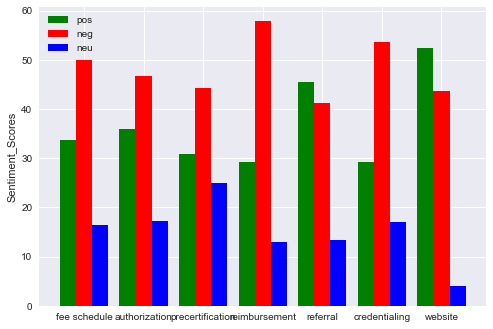

In [47]:
provider_filter = ['fee schedule',
                   'authorization',
                   'precertification',
                   'reimbursement',
                   'referral',
                   'credentialing',
                   'website']

def senti_map_ppm(pf,data):
    sentiment_map = dict()
    for topic in pf:
        new_df = parent_df[parent_df['cleaned'].str.contains(topic)]
        neg_df = new_df.loc[new_df['sentiment_predicted']=='negative']
        pos_df = new_df.loc[new_df['sentiment_predicted']=='positive']
        neu_df = new_df.loc[new_df['sentiment_predicted']=='neutral']
        pos_per = pos_df.shape[0]/new_df.shape[0] * 100
        neg_per = neg_df.shape[0]/new_df.shape[0] * 100
        neu_per = neu_df.shape[0]/new_df.shape[0] * 100
        sentiment_map[topic]=[pos_per,neg_per,neu_per]
    return sentiment_map
        
df_sentiments = senti_map_ppm(provider_filter,parent_df)
df_sentiments = pd.DataFrame(df_sentiments,index=['positive','negative','neutral'])

df_sT = df_sentiments.T
import matplotlib.pyplot as plt

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

posvals = list(df_sT.positive)
rects1 = ax.bar(ind, posvals, width, color='g')
negvals = list(df_sT.negative)
rects2 = ax.bar(ind+width, negvals, width, color='r')
neuvals = list(df_sT.neutral)
rects3 = ax.bar(ind+width*2,neuvals, width, color='b')

ax.set_ylabel('Sentiment_Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels(provider_filter)
ax.legend( (rects1[0], rects2[0], rects3[0]), ('pos', 'neg', 'neu') )

plt.show() 


In [48]:
parent_df.columns

Index(['id', 'fixid', 'tin', 'mpin', 'npi', 'strategic_acct_flag',
       'core_acct_flag', 'medicare_flag', 'cands_flag', 'fqhc_flag',
       ...
       'polarity', 'polarity_compound', 'polarity_positive',
       'polarity_negative', 'polarity_neutral', 'subjectivity', 'sentiment',
       'sentiment_predicted', 'textblob_polarity', 'textblob_sentiment'],
      dtype='object', length=118)

In [49]:
parent_df.head(5)

,id,fixid,tin,mpin,npi,strategic_acct_flag,core_acct_flag,medicare_flag,cands_flag,fqhc_flag,...,polarity,polarity_compound,polarity_positive,polarity_negative,polarity_neutral,subjectivity,sentiment,sentiment_predicted,textblob_polarity,textblob_sentiment
0,201600000261,33037073,363132612,570724,1003808411,0,,,1,,...,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.4588,0.500,0.000,0.500,0.677273,positive,positive,0.468182,positive
1,201600000234,89457743,650457414,1270697,1003812322,0,0,,0,0,...,"{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...",-0.4019,0.000,0.184,0.816,0.000000,negative,negative,-0.050000,negative
2,201600000086,49468266,841367175,1114390,1003854324,0,1,0,0,0,...,"{'neg': 0.073, 'neu': 0.9, 'pos': 0.027, 'comp...",-0.4939,0.027,0.073,0.900,0.568000,negative,negative,0.086000,positive
3,201600000179,18743220,426004813,3361077,1013171891,0,1,0,1,1,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0.000000,negative,neutral,0.000000,neutral
4,201600000250,71018812,593575383,400466,1013923713,0,,1,1,,...,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.3818,0.191,0.000,0.809,0.436364,positive,positive,0.090909,positive


In [50]:
parent_df['medicare_flag'].head(10)

0     
1     
2    0
3    0
4    1
5    0
6    1
7    1
8     
9    1
Name: medicare_flag, dtype: object

In [51]:
parent_df['medicare_flag'].value_counts()

1    2751
     2454
0     159
Name: medicare_flag, dtype: int64

In [52]:
parent_df['cands_flag'].value_counts()

1    2746
0    2618
Name: cands_flag, dtype: int64

In [53]:
for ind,row in parent_df.iterrows():
    if row['medicare_flag']=='1' and row['cands_flag']=='1':
        parent_df.loc[ind,'LOB'] = 'M&R and C&S'
    elif row['medicare_flag']=='0' and row['cands_flag']=='0':
        parent_df.loc[ind,'LOB'] = 'Others'
    elif row['medicare_flag']=='' and row['cands_flag']=='0':
        parent_df.loc[ind,'LOB'] = 'Others'
    elif row['medicare_flag']=='0' and row['cands_flag']=='1':
        parent_df.loc[ind,'LOB'] = 'C&S'
    elif row['medicare_flag']=='1' and row['cands_flag']=='0':
        parent_df.loc[ind,'LOB'] = 'M&R'
    elif row['medicare_flag']=='' and row['cands_flag']=='1':
        parent_df.loc[ind,'LOB'] = 'C&S'

In [54]:
parent_df.shape

(5364, 119)

In [55]:
parent_df.columns

Index(['id', 'fixid', 'tin', 'mpin', 'npi', 'strategic_acct_flag',
       'core_acct_flag', 'medicare_flag', 'cands_flag', 'fqhc_flag',
       ...
       'polarity_compound', 'polarity_positive', 'polarity_negative',
       'polarity_neutral', 'subjectivity', 'sentiment', 'sentiment_predicted',
       'textblob_polarity', 'textblob_sentiment', 'LOB'],
      dtype='object', length=119)

In [65]:
PATH = 'C:\\Users\\cvikas10\\Desktop\\VOP_POC'

In [ ]:
parent_df.to_csv(os.path.join(PATH,'Base_File_Analytics.txt'),sep='\t',index=False)

In [210]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,1))
sklearn_tfidf = TfidfVectorizer(norm='l2', min_df=0, use_idf=True, smooth_idf=False, sublinear_tf=False)
tfidf_set = sklearn_tfidf.fit_transform([parent_df['bagofwords'][7]])

feature_array = np.array(sklearn_tfidf.get_feature_names())
tfidf_sorting = np.argsort(tfidf_set.toarray()).flatten()[::-1]

n = 10

top_nwords = feature_array[tfidf_sorting][:n]
top_nwords

array(['pa', 'claims', 'denial', 'time', 'cost', 'leads', 'ivf', 'issue',
       'infertility', 'huge'], dtype='<U13')

In [56]:
parent_df.shape

(5364, 119)

In [78]:
parent_df['TOPICS'] = ['']*parent_df.shape[0]   
for ind,row in parent_df.iterrows():
    try:
        comment = row['bagofwords']
        sklearn_tfidf = TfidfVectorizer(norm='l2', min_df=0, use_idf=True, smooth_idf=False, sublinear_tf=False)
        tfidf_set = sklearn_tfidf.fit_transform([comment])
        feature_array = np.array(sklearn_tfidf.get_feature_names())
        tfidf_sorting = np.argsort(tfidf_set.toarray()).flatten()[::-1]
    
        n = 10
        top_nwords = feature_array[tfidf_sorting][:n]
        top_nwords=[word for word in top_nwords if len(word)>=4]
        parent_df.loc[ind,'TOPICS'] = '|'.join(top_nwords)
    except:
        continue

In [79]:
parent_df.shape

(5364, 121)

In [54]:
parent_df.to_csv(os.path.join(PATH,'Final_File.txt'),
                 sep='\t',
                 index=False)

In [268]:
'TOPICS' in parent_df.columns

True

In [74]:
def bigram_colwise(col):
    tokens = word_tokenize(col)
    tokens = [s for s in tokens if len(s)>=4]
    finder = BigramCollocationFinder.from_words(tokens)
    bigram_measures = BigramAssocMeasures()
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    scoredList = sorted(scored, key=itemgetter(1), reverse=True)
    word_dict = {}
    listLen = len(scoredList)
    for i in range(listLen):
        word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
    return list(word_dict.keys())[:4]

parent_df['BIGRAMS_TOPICS'] = parent_df['bagofwords'].apply(lambda c: '|'.join(bigram_colwise(c)))

In [75]:
parent_df.shape

(5364, 121)

In [76]:
parent_df.columns

Index(['id', 'fixid', 'tin', 'mpin', 'npi', 'strategic_acct_flag',
       'core_acct_flag', 'medicare_flag', 'cands_flag', 'fqhc_flag',
       ...
       'polarity_negative', 'polarity_neutral', 'subjectivity', 'sentiment',
       'sentiment_predicted', 'textblob_polarity', 'textblob_sentiment', 'LOB',
       'TOPICS', 'BIGRAMS_TOPICS'],
      dtype='object', length=121)

In [80]:
parent_df.to_csv(os.path.join(PATH,'FinalFile.txt'),
                 sep='\t',
                 index=False)